<a href="https://colab.research.google.com/github/10scar/AlgorithmsUN2024I/blob/main/preicfes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from dateutil.relativedelta import relativedelta

In [2]:
file_path = 'preicfesdata.csv'
data = pd.read_csv(file_path)

In [13]:
# Reemplazar '0000-00-00 00:00:00' por NaT
data['user_registered'].replace('0000-00-00 00:00:00', pd.NaT, inplace=True)

# Convertir la columna 'user_registered' a formato de fecha
data['user_registered'] = pd.to_datetime(data['user_registered'], errors='coerce')

# Crear una columna de año de registro
data['año_registro'] = data['user_registered'].dt.year

# Filtrar datos que tengan fechas válidas
data = data[data['user_registered'].notna()]

data['promedio_global'] = pd.to_numeric(data['promedio_global'], errors='coerce')

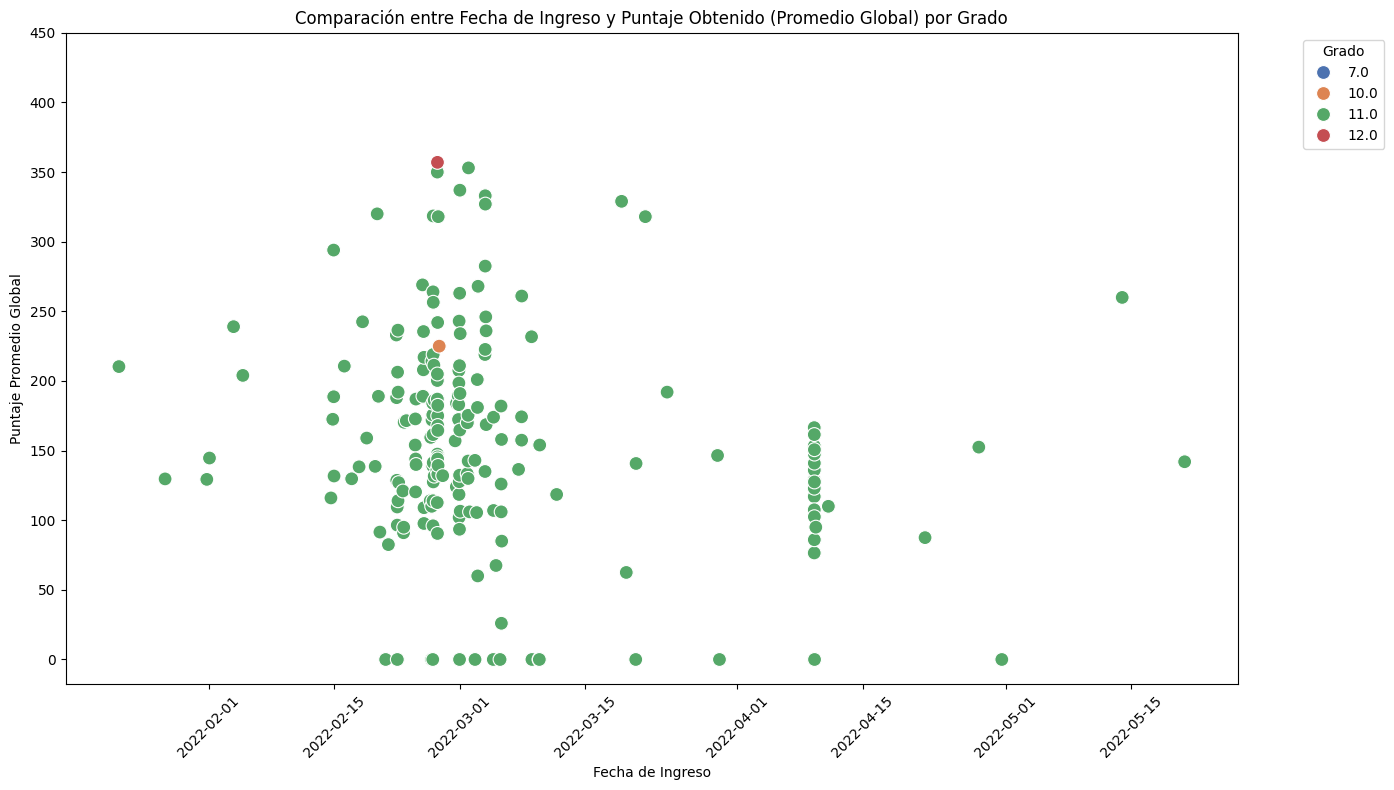

In [14]:
# Configuración de la gráfica
plt.figure(figsize=(14, 8))

# Gráfico de dispersión
sns.scatterplot(data=data, x='user_registered', y='promedio_global', hue='user_grado', palette='deep', s=100)

# Personalizar el gráfico
plt.title('Comparación entre Fecha de Ingreso y Puntaje Obtenido (Promedio Global) por Grado')
plt.xlabel('Fecha de Ingreso')
plt.ylabel('Puntaje Promedio Global')
plt.legend(title='Grado', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar los ticks del eje Y para que se muestren cada 50
y_ticks = range(0, int(data['promedio_global'].max()) + 50, 50)
plt.yticks(y_ticks)

plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

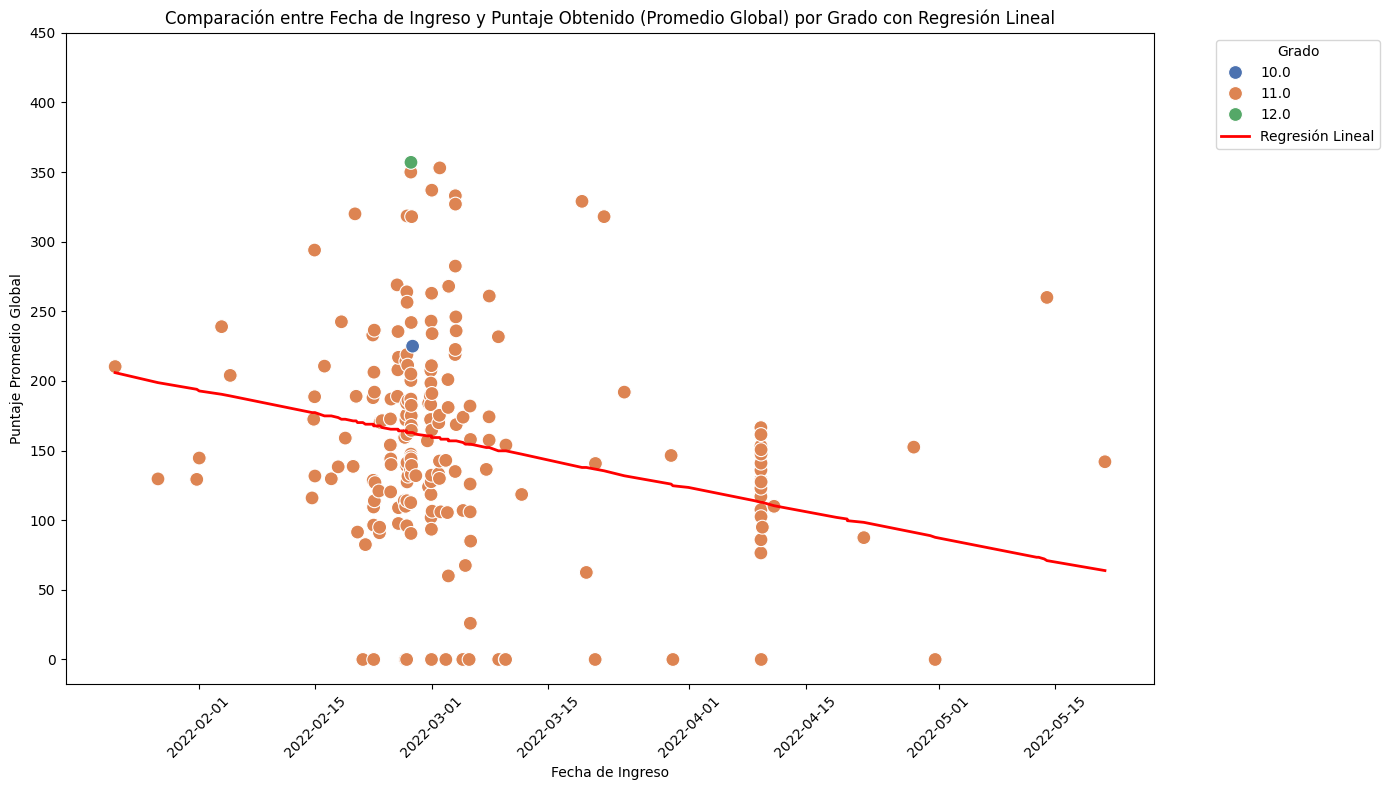

In [15]:


# Convertir las fechas a un formato numérico para la regresión
data['user_registered_ordinal'] = data['user_registered'].map(pd.Timestamp.toordinal)

# Configuración de la gráfica
plt.figure(figsize=(14, 8))

# Gráfico de dispersión
sns.scatterplot(data=data, x='user_registered', y='promedio_global', hue='user_grado', palette='deep', s=100)

# Realizar la regresión lineal
X = data['user_registered_ordinal'].values.reshape(-1, 1)  # variable independiente
y = data['promedio_global'].values  # variable dependiente

model = LinearRegression()
model.fit(X, y)

# Predicciones
data['predicted'] = model.predict(X)

# Convertir de nuevo las predicciones a un formato de fecha para graficar
plt.plot(data['user_registered'], data['predicted'], color='red', linewidth=2, label='Regresión Lineal')

# Personalizar el gráfico
plt.title('Comparación entre Fecha de Ingreso y Puntaje Obtenido (Promedio Global) por Grado con Regresión Lineal')
plt.xlabel('Fecha de Ingreso')
plt.ylabel('Puntaje Promedio Global')
plt.legend(title='Grado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks(range(0, int(data['promedio_global'].max()) + 50, 50))

plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


<ipython-input-23-6fc0c3f9c405>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=promedio_diferencia, x='user_grado', y='promedio_diferencia_meses', palette='deep')


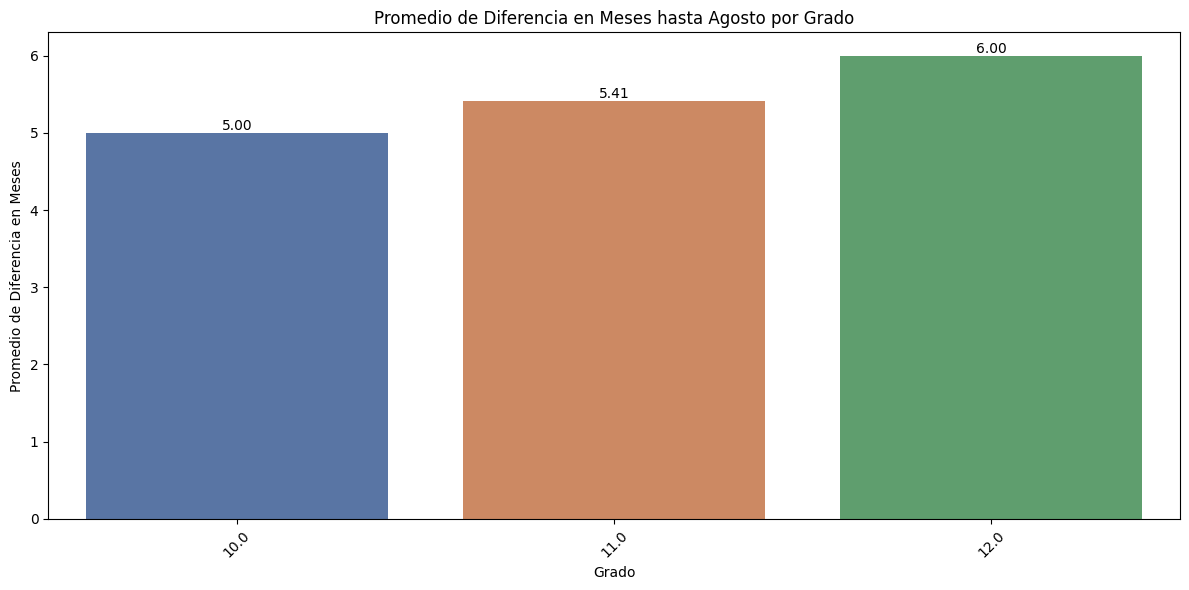

In [23]:
# Definir la fecha de referencia (1 de agosto del año actual)
fecha_referencia = pd.Timestamp(year=2022, month=8, day=1)

# Calcular la diferencia en meses
data['diferencia_meses'] = data['user_registered'].apply(lambda x: (fecha_referencia.year - x.year) * 12 + (fecha_referencia.month - x.month))

# Agrupar por grado y calcular el promedio
promedio_diferencia = data.groupby('user_grado')['diferencia_meses'].mean().reset_index()

# Renombrar la columna para mayor claridad
promedio_diferencia.rename(columns={'diferencia_meses': 'promedio_diferencia_meses'}, inplace=True)

# Graficar el promedio de diferencias en meses por grado
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=promedio_diferencia, x='user_grado', y='promedio_diferencia_meses', palette='deep')

# Añadir los números promedio encima de las barras
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=10)

# Personalizar el gráfico
plt.title('Promedio de Diferencia en Meses hasta Agosto por Grado')
plt.xlabel('Grado')
plt.ylabel('Promedio de Diferencia en Meses')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

<ipython-input-27-fa5e9578fe5b>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  promedio_sisben = pd.concat([nuevas_categorias, promedio_sisben], ignore_index=True)
<ipython-input-27-fa5e9578fe5b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=promedio_sisben, x='user_sisben', y='promedio_puntaje', palette='deep')


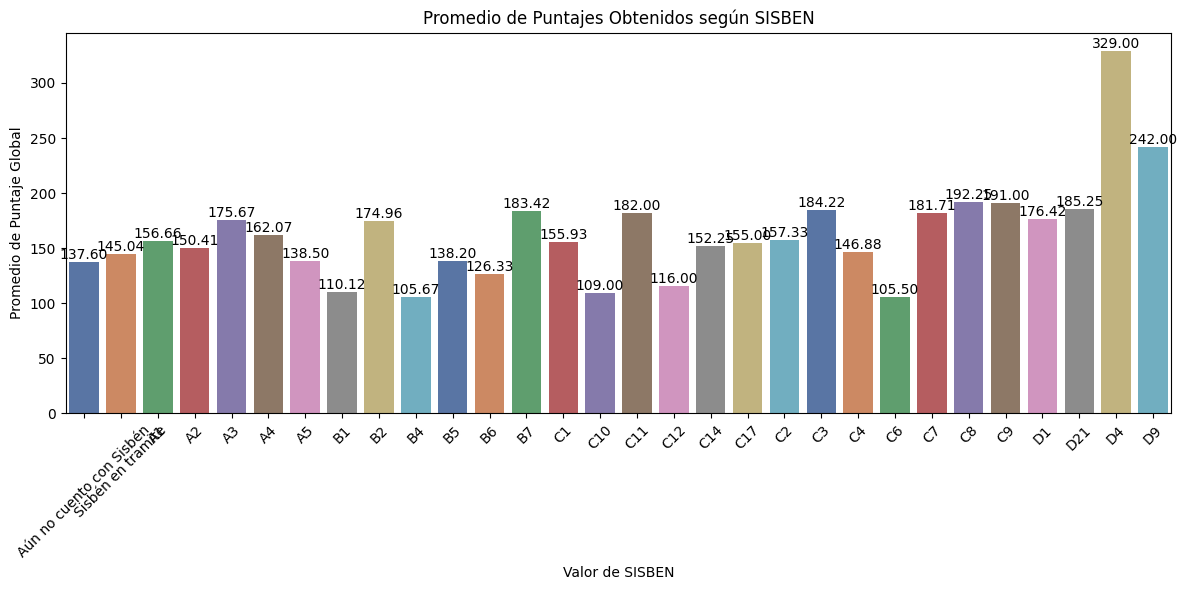

In [27]:
# Limpiar y convertir la columna 'promedio_global' a numérico
data['promedio_global'] = pd.to_numeric(data['promedio_global'], errors='coerce')

# Agrupar por SISBEN y calcular el promedio de puntajes
promedio_sisben = data.groupby('user_sisben')['promedio_global'].mean().reset_index()

# Renombrar la columna para mayor claridad
promedio_sisben.rename(columns={'promedio_global': 'promedio_puntaje'}, inplace=True)

# Agregar categorías adicionales
nuevas_categorias = pd.DataFrame({
    'user_sisben': ['Aún no cuento con Sisbén', 'Sisbén en tramite'],
    'promedio_puntaje': [None, None]  # Inicialmente sin promedio
})

## Concatenar las nuevas categorías con el DataFrame existente
promedio_sisben = pd.concat([nuevas_categorias, promedio_sisben], ignore_index=True)

# Graficar el promedio de puntajes por SISBEN
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=promedio_sisben, x='user_sisben', y='promedio_puntaje', palette='deep')

# Añadir los números promedio encima de las barras
for p in bar_plot.patches:
    # Solo añadir anotaciones si hay un valor válido
    if pd.notna(p.get_height()):
        bar_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='bottom', fontsize=10)

# Personalizar el gráfico
plt.title('Promedio de Puntajes Obtenidos según SISBEN')
plt.xlabel('Valor de SISBEN')
plt.ylabel('Promedio de Puntaje Global')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

<ipython-input-31-e3ac428e5114>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  promedio_sisben = pd.concat([nuevas_categorias, promedio_sisben], ignore_index=True)
<ipython-input-31-e3ac428e5114>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predicciones'] = model.predict(X)


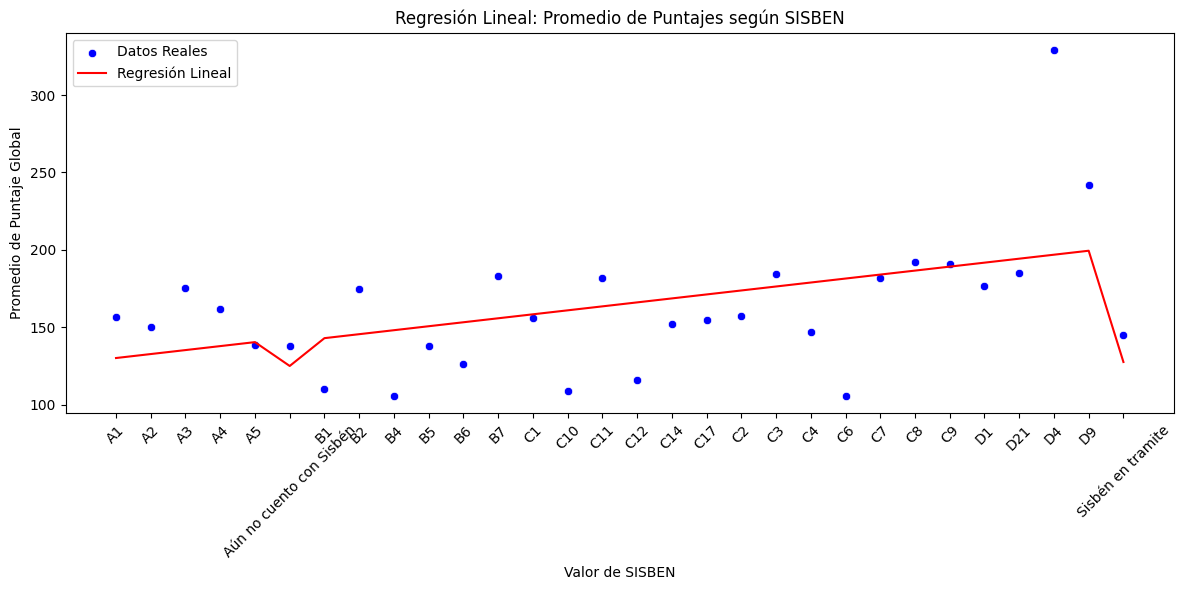

In [31]:
# Limpiar y convertir la columna 'promedio_global' a numérico
data['promedio_global'] = pd.to_numeric(data['promedio_global'], errors='coerce')

# Agrupar por SISBEN y calcular el promedio de puntajes
promedio_sisben = data.groupby('user_sisben')['promedio_global'].mean().reset_index()

# Renombrar la columna para mayor claridad
promedio_sisben.rename(columns={'promedio_global': 'promedio_puntaje'}, inplace=True)

# Agregar categorías adicionales
nuevas_categorias = pd.DataFrame({
    'user_sisben': ['Aún no cuento con Sisbén', 'Sisbén en tramite'],
    'promedio_puntaje': [None, None]  # Inicialmente sin promedio
})

# Concatenar las nuevas categorías con el DataFrame existente
promedio_sisben = pd.concat([nuevas_categorias, promedio_sisben], ignore_index=True)

# Obtener las categorías únicas y mapearlas
categorias_unicas = promedio_sisben['user_sisben'].unique()
sisben_mapping = {
    'Aún no cuento con Sisbén': 0,
    'Sisbén en tramite': 1,
}

# Asignar valores a las otras categorías en orden ascendente
for i, categoria in enumerate(categorias_unicas[2:], start=2):  # Empezar desde 2 para las nuevas categorías
    sisben_mapping[categoria] = i

# Aplicar el mapeo
promedio_sisben['sisben_numerico'] = promedio_sisben['user_sisben'].map(sisben_mapping)

# Preparar datos para regresión, eliminando filas con NaN
valid_data = promedio_sisben.dropna(subset=['promedio_puntaje', 'sisben_numerico'])

# Verificar si hay datos válidos
if valid_data.shape[0] > 0:
    X = valid_data[['sisben_numerico']]
    y = valid_data['promedio_puntaje']

    # Ajustar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Hacer predicciones
    valid_data['predicciones'] = model.predict(X)

    # Graficar resultados
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=valid_data, x='user_sisben', y='promedio_puntaje', color='blue', label='Datos Reales')
    sns.lineplot(data=valid_data, x='user_sisben', y='predicciones', color='red', label='Regresión Lineal')

    # Añadir etiquetas y título
    plt.title('Regresión Lineal: Promedio de Puntajes según SISBEN')
    plt.xlabel('Valor de SISBEN')
    plt.ylabel('Promedio de Puntaje Global')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    # Mostrar la gráfica
    plt.show()
else:
    print("No hay datos válidos para realizar la regresión.")